## datasets 和 dataloaders

这个两个API函数就是用来从模型训练中分离数据预处理以及加载，这样做的两个目的：
- 代码的可读性更好
- 代码的模块更好

两个重要的AI函数：
- `torch.utils.data.Dataset`: 这个用来加载预存放的数据集:包含数据集和标签
- `torch.utils.data.DataLoader`:用来将Dataset数据集打包成方便调用的迭代器


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


/root/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

In [3]:
print(type(training_data))
print(len(training_data))
print(training_data[0][0].shape)

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000
torch.Size([1, 28, 28])


In [4]:
# torch 中 randint
# torch 生成随机数的案例
a = torch.randint(110, size=(1,))
b = torch.randint(110, size=(2,5))
c = torch.randint(2,5, size=(3,3))
print(a)
print(b)
print(c)

tensor([66])
tensor([[97, 36, 24, 17, 53],
        [25, 30, 37, 96, 19]])
tensor([[3, 4, 4],
        [4, 3, 3],
        [2, 4, 3]])


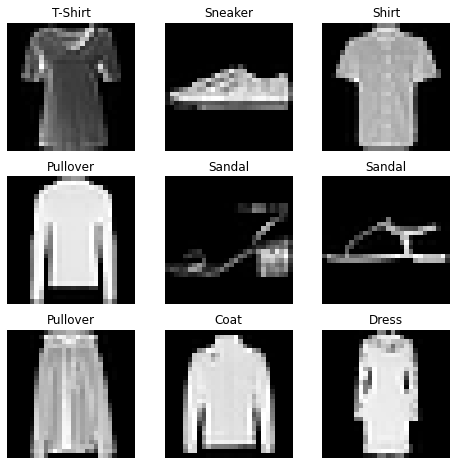

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # 获得dataset的地方
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class sanan_dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_lables = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_tranform = target_transform

    def __len__(self):
        return len(self.img_lables)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_lables.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_lables.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_tranform:
            label = self.target_tranform(label)
        return image, label

In [10]:
from torch.utils.data import DataLoader
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


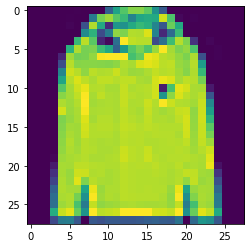

label:Coat


In [62]:
test_images, test_lables = next(iter(test_dataloader))
print(test_images.shape)
print(test_lables.shape)

img = test_images[0].squeeze()
label = test_lables[0].item()
plt.imshow(img)
plt.show()
print(f"label:{labels_map[label]}")